# OurOffice Data Science Take home
*by Ting Gu*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gender_predictor import GenderPredictor

In [2]:
data=pd.read_csv('dataset.csv',index_col=0)

## Exploratory data analysis before answering questions
### Checking the data quality (vairable type, missing values...)&Visulizing data

In [3]:
data.shape

(148654, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 14.7+ MB


In [5]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [6]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


### Based on the summary ststistics, we could know this data includes 148654 records of salary infomation for employees in SF from 2011 to 2014. 
- 'BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits' have minimum value less than 0, which doesn't make sense. So I will deal with the negative value before starting the analaysis.
- Variable 'Notes' and 'Status‘ don't provide any help for future analysis.

In [7]:
data=data.drop(['Notes', 'Status'], axis = 1)

### Replace null value with zero

In [8]:
values={'BasePay':0,
       'OvertimePay':0,
       'OtherPay':0,
       'Benefits':0}
data = data.fillna(value=values)

In [9]:
data.shape

(148654, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 10 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null float64
OvertimePay         148654 non-null float64
OtherPay            148654 non-null float64
Benefits            148654 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Agency              148654 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 12.5+ MB


### Delete records with negative value (21 records)

In [11]:
data=data[(data[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']]>=0).all(1)]

In [12]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148633.000000,148633.000000,148633.000000,148633.000000,148633.000000,148633.000000,148633.000000
mean,66060.984555,5066.614264,3649.159407,18926.122103,74776.758227,93702.880330,2012.522636
std,42883.873386,11454.916998,8056.915870,17165.212525,50514.358835,62790.060508,1.117589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,32819.530000,0.000000,0.000000,0.000000,36178.330000,44097.080000,2012.000000
50%,64867.540000,0.000000,811.800000,23220.670000,71430.240000,92409.150000,2013.000000
75%,94611.000000,4658.810000,4237.030000,33469.400000,105846.070000,132881.790000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [13]:
data.shape

(148633, 10)

In [14]:
data['Agency'].value_counts()

San Francisco    148633
Name: Agency, dtype: int64

In [15]:
data['EmployeeName'].value_counts()

Kevin Lee                 13
William Wong              11
Steven Lee                11
Richard Lee               11
KEVIN LEE                  9
John Chan                  9
Stanley Lee                9
Michael Wong               9
William Lee                8
RICHARD LEE                8
Victor Lee                 8
MICHAEL LEE                8
David Wong                 8
DAVID WONG                 8
Michael A Johnson          7
Sandy Wong                 7
MICHAEL BROWN              7
STANLEY LEE                7
Michael Brown              7
WILLIAM WONG               7
STEVEN LEE                 7
Michael Lee                7
John Miller                7
Jerry Wong                 6
Besilda M Mandapat         6
JOHN CHAN                  6
Emelita M Hathaway         6
Maryann B Sabath           6
Jamil J Hawkins            6
Vincent Wong               6
                          ..
ERIC ANDERSEN              1
ALEXANDER KRAWIEC          1
Ayoola Mitchell            1
Shirley  Ledbe

### Boxplot for numerical variables

Text(0.5,1,'Boxplot for numerical variables')

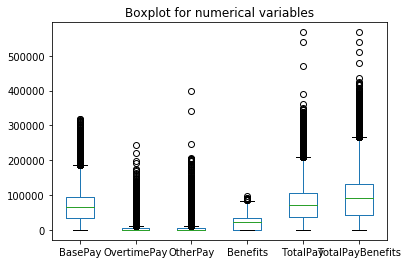

In [16]:
data[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']].plot(kind='box')
plt.title('Boxplot for numerical variables')

### Distribution of numerical variables

Text(0.5,1,'Histogram of BasePay')

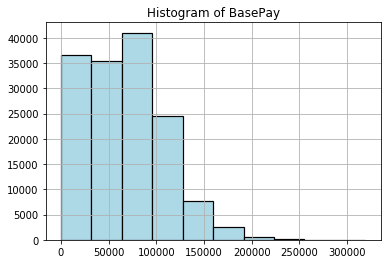

In [17]:
data['BasePay'].hist(color='lightblue',edgecolor='black', linewidth=1.2)
plt.title('Histogram of BasePay')

Text(0.5,1,'Histogram of OvertimePay')

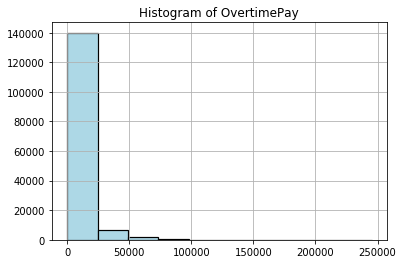

In [18]:
data['OvertimePay'].hist(color='lightblue',edgecolor='black', linewidth=1.2)
plt.title('Histogram of OvertimePay')

Text(0.5,1,'Histogram of OtherPay')

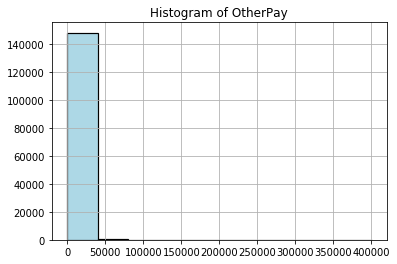

In [19]:
data['OtherPay'].hist(color='lightblue',edgecolor='black', linewidth=1.2)
plt.title('Histogram of OtherPay')

Text(0.5,1,'Histogram of Benefits')

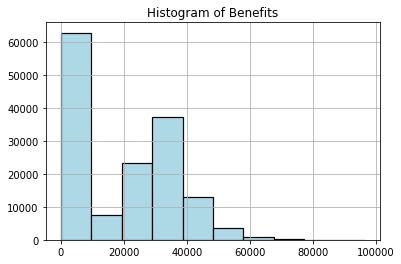

In [20]:
data['Benefits'].hist(color='lightblue',edgecolor='black', linewidth=1.2)
plt.title('Histogram of Benefits')

Text(0.5,1,'Histogram of TotalPay')

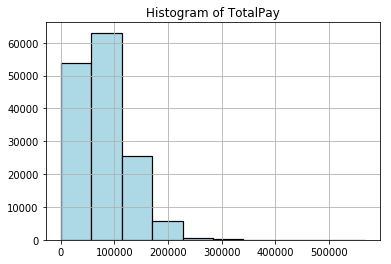

In [21]:
data['TotalPay'].hist(color='lightblue',edgecolor='black', linewidth=1.2)
plt.title('Histogram of TotalPay')

Text(0.5,1,'Histogram of TotalPayBenefits')

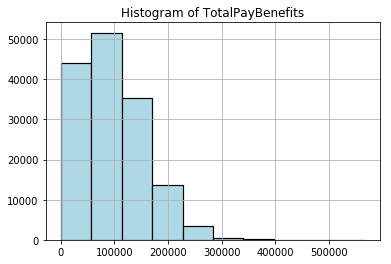

In [22]:
data['TotalPayBenefits'].hist(color='lightblue',edgecolor='black', linewidth=1.2)
plt.title('Histogram of TotalPayBenefits')

# Starting the questions
##  Assumption: salary mentioned in the questions refers to 'TotalPayBenefits'

## (1) Computer Avg BasePay

In [23]:
data['BasePay'].mean()

66060.984555448653

## (2) What are the TotalBenefits of JOSEPH DRISCOLL?

In [24]:
data.query('EmployeeName=="JOSEPH DRISCOLL"')['TotalPayBenefits']

Id
25    270324.91
Name: TotalPayBenefits, dtype: float64

## (3) Highest paid person by name

In [25]:
data.loc[data['TotalPayBenefits']==data['TotalPayBenefits'].max(),'EmployeeName']

Id
1    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [26]:
data.groupby(['EmployeeName'])['TotalPayBenefits'].max().sort_values(ascending=False)

EmployeeName
NATHANIEL FORD           567595.43
GARY JIMENEZ             538909.28
David Shinn              510732.68
Amy P Hart               479652.21
William J Coaker Jr.     436224.36
Gregory P Suhr           425815.28
Joanne M Hayes-White     422353.40
Ellen G Moffatt          415767.94
Gary Altenberg           407274.78
Samson  Lai              404167.27
John L Martin            401070.87
Harlan L Kelly-Jr        398984.53
Robert L Shaw            398421.67
David L Franklin         396778.68
Samson Lai               395361.86
Gregory Suhr             391362.30
Khoa Trinh               389496.02
Joanne Hayes-White       386807.48
Edward D Reiskin         386168.49
Thomas A Siragusa        386109.21
Yifang  Qian             381697.80
Frederick Binkley        381643.11
Amy Hart                 376071.59
Edward Reiskin           376002.11
John Martin              374846.83
John Goldberg            374690.64
Yifang Qian              374597.99
Michael J Biel           374260.34
David F

## (4) What was the average (mean) BasePay of all employees per year? (2011-2014) 

In [27]:
data.groupby(['Year'])['BasePay'].mean()

Year
2011    63595.956517
2012    65456.016752
2013    68516.171889
2014    66560.929654
Name: BasePay, dtype: float64

Text(0.5,1,'Average BasePay of all employees per year (2011-2014)')

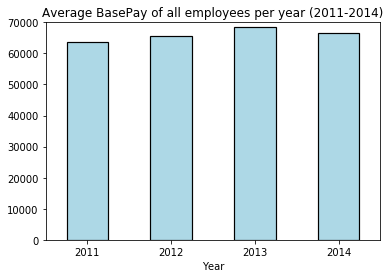

In [28]:
data.groupby(['Year'])['BasePay'].mean().plot(kind='bar',color='lightblue',edgecolor='black', linewidth=1.2)
plt.xticks(rotation='horizontal')
plt.ylim([0,70000])
plt.title('Average BasePay of all employees per year (2011-2014)')

## (5) How many Job Titles were represented by only one person in 2013

In [29]:
count = data.query('Year==2013')['JobTitle'].value_counts()

In [30]:
sum(count==1)

202

## (6) How many people have the word Chief in their job title?

In [31]:
sum(data['JobTitle'].str.contains('Chief'))

423

## (7) Is there a correlation between length of the Job Title string and Salary?

In [32]:
data['JobTitle_Length']=data.loc[:,'JobTitle'].apply(lambda x: len(x))

In [33]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,JobTitle_Length
Id,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,46
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,31
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,31
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,36
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,44


In [34]:
data.loc[:,['TotalPayBenefits','JobTitle_Length']].corr()

,TotalPayBenefits,JobTitle_Length
TotalPayBenefits,1.000000,-0.037033
JobTitle_Length,-0.037033,1.000000


## (8)  Show a correlation heatmap of the data

In [35]:
columns=['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']

In [36]:
corr = data.loc[:,columns].corr()

In [37]:
corr

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
BasePay,1.000000,0.268094,0.281781,0.654093,0.954682,0.946851
OvertimePay,0.268094,1.000000,0.316580,0.226145,0.504856,0.467977
OtherPay,0.281781,0.316580,1.000000,0.160323,0.470503,0.422346
Benefits,0.654093,0.226145,0.160323,1.000000,0.632141,0.781930
TotalPay,0.954682,0.504856,0.470503,0.632141,1.000000,0.977308
TotalPayBenefits,0.946851,0.467977,0.422346,0.781930,0.977308,1.000000


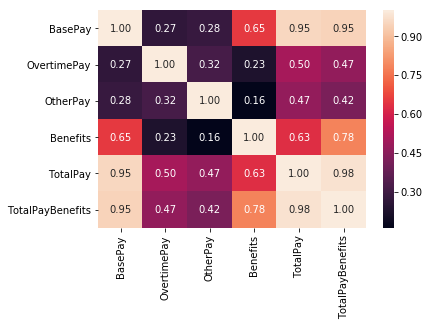

In [38]:
sns.heatmap(corr,annot=True, fmt=".2f")

## (9) Largest BasePay by Job

In [39]:
data.groupby(['JobTitle'])['BasePay'].max().sort_values(ascending=False)

JobTitle
Chief of Police                                       319275.01
Asst Med Examiner                                     318835.49
Dep Dir for Investments, Ret                          315572.01
Chief, Fire Department                                313686.01
Executive Contract Employee                           313312.52
Dept Head V                                           311758.96
Gen Mgr, Public Trnsp Dept                            305307.89
EXECUTIVE CONTRACT EMPLOYEE                           294580.02
Mayor                                                 285446.37
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)                285262.00
Administrator, DPH                                    282619.96
Deputy Chief 3                                        278964.00
Adm, SFGH Medical Center                              271831.50
DEPARTMENT HEAD V                                     271329.03
Dep Chf of Dept (Fire Dept)                           270756.03
Controller                     

## (10) Top 30 sectors for SF salary 

In [40]:
data.groupby(['JobTitle'])['TotalPayBenefits'].mean().sort_values(ascending=False).head(30)

JobTitle
Chief Investment Officer                          436224.360000
Chief of Police                                   411732.266667
Chief, Fire Department                            408865.326667
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Gen Mgr, Public Trnsp Dept                        380696.440000
Dep Dir for Investments, Ret                      355731.260000
Mayor                                             354212.906667
Adm, SFGH Medical Center                          347079.706667
Controller                                        343061.140000
Asst Chf of Dept (Fire Dept)                      342597.550556
Dept Head V                                       340643.507222
Administrator, DPH                                331564.035000
Dep Chf of Dept (Fire Dept)                       326752.242857
Deputy Chief 3                                    324670.490952
Port Director                                     322142.336667
Assistant Deputy Chief 2       

## (11) Is BasePay a good predictor of TotalPay (in this case, just use correlation). Depict a graph with a regression line while also showing their correlation. Interpret the results 


In [41]:
data.loc[:,['BasePay','TotalPay']].corr()

,BasePay,TotalPay
BasePay,1.000000,0.954682
TotalPay,0.954682,1.000000


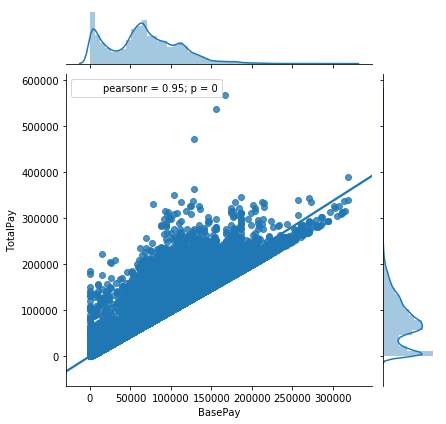

In [42]:
sns.jointplot(x="BasePay", y="TotalPay", data=data,kind='reg')

### Comments: Based on the pearson correlation and scatter plot, BasePay is a good predictor for TotalPay. At the same time, there are some obvious outliners in the graph.

## (12) What other interesting insights can you pull from the data?

### Top 10 Most Common Jobs in SF

Transit Operator                7036
Special Nurse                   4388
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2418
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64


Text(0.5,1,'Top 10 Most Common Jobs in SF')

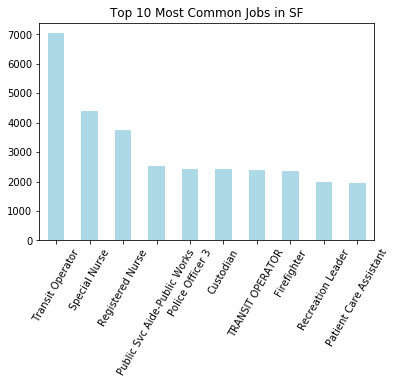

In [43]:
job_title_counts = data['JobTitle'].value_counts()[:10]
print (job_title_counts)

#plot bar graph
job_title_counts.plot(kind = 'bar',color='lightblue')
plt.xticks(rotation=60)
plt.title('Top 10 Most Common Jobs in SF')

### Gender Pay Gap Analysis
*Using a package called GenderPredictor to predict gender based on FirstName*

In [44]:
gp = GenderPredictor()
gp.train_and_test()

import complete
32,031 male names
56,347 female names
classifier accuracy: 96.80%


In [45]:
data['FirstName']=data['EmployeeName'].str.split().str[:1].str[0]

In [46]:
data[['EmployeeName','FirstName']].head(20)

,EmployeeName,FirstName
Id,,
1,NATHANIEL FORD,NATHANIEL
2,GARY JIMENEZ,GARY
3,ALBERT PARDINI,ALBERT
4,CHRISTOPHER CHONG,CHRISTOPHER
5,PATRICK GARDNER,PATRICK
6,DAVID SULLIVAN,DAVID
7,ALSON LEE,ALSON
8,DAVID KUSHNER,DAVID
9,MICHAEL MORRIS,MICHAEL


In [47]:
data['Gender']=data['FirstName'].apply(gp.classify).astype('category')

In [48]:
data.groupby(['Gender'])['TotalPayBenefits'].mean()

Gender
F     85022.488407
M    100348.536334
Name: TotalPayBenefits, dtype: float64

Text(0.5,1,'Gender Pay Gap in SF')

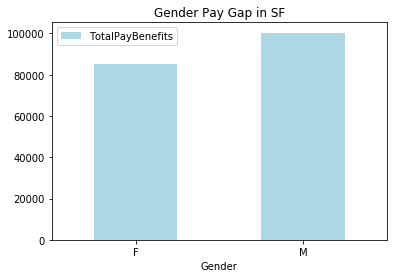

In [49]:
gender_salary = data.groupby(['Gender'])['TotalPayBenefits'].mean().reset_index().set_index('Gender')
gender_salary.plot(kind='bar',color='lightblue')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.title('Gender Pay Gap in SF')

### Does gender pay gap become smaller as time changes?

In [50]:
gender_salary_year = data.groupby(['Year','Gender'])['TotalPayBenefits'].mean().reset_index()
gender_salary_year.pivot_table(index=['Year'],aggfunc=np.diff)

,TotalPayBenefits
Year,
2011,12767.638452
2012,16106.209318
2013,16729.432063
2014,15825.656739


Text(0.5,1,'Gender Pay Gap in SF from 2011 to 2014')

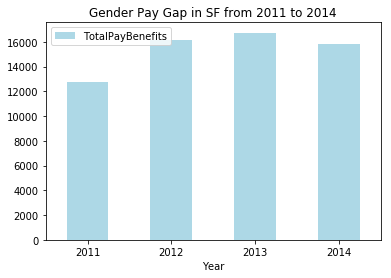

In [51]:
gender_salary_year.pivot_table(index=['Year'],aggfunc=np.diff).plot(kind='bar',color='lightblue')
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.title('Gender Pay Gap in SF from 2011 to 2014')

## Bonus Problem:
*Is there a strong correlation between vowel count in a name and average salary? Create a VowelCount column, and create a plot with these 2 variables. Can you show a correlation between these two variables? Is it a strong one and what is it exactly?*

In [52]:
def countvowels(string):
    num_vowels=0
    for char in string:
        if char in "aeiouAEIOU":
           num_vowels = num_vowels+1
    return num_vowels

In [53]:
data['VowelCount']=data.loc[:,'EmployeeName'].apply(countvowels)

In [54]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,JobTitle_Length,FirstName,Gender,VowelCount
Id,,,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,46,NATHANIEL,M,5
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,31,GARY,F,4
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,31,ALBERT,M,5
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,36,CHRISTOPHER,M,4
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,44,PATRICK,M,4


In [55]:
mean_salary=data.groupby(['VowelCount'])['TotalPayBenefits'].mean()

In [56]:
pd.DataFrame(mean_salary).reset_index().corr()

,VowelCount,TotalPayBenefits
VowelCount,1.000000,-0.010001
TotalPayBenefits,-0.010001,1.000000


Text(0,0.5,'Average Total Salary')

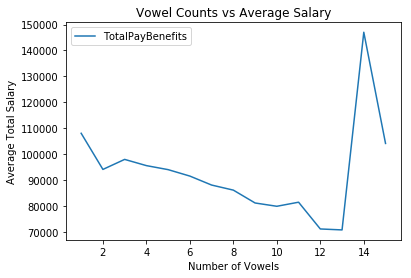

In [57]:
pd.DataFrame(mean_salary).plot()
plt.title('Vowel Counts vs Average Salary')
plt.xlabel('Number of Vowels')
plt.ylabel('Average Total Salary')

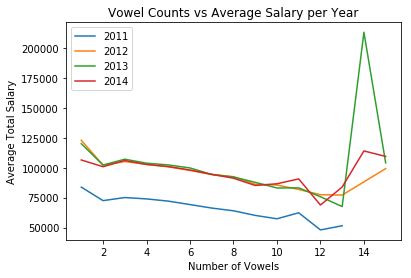

In [58]:
mean_salary_year = data.groupby(('Year', 'VowelCount'))['TotalPayBenefits'].mean()
years = data.Year.unique()
for year in years:
    X = mean_salary_year[year].index
    Y = mean_salary_year[year].values
    plt.plot(X,Y)
    plt.title('Vowel Counts vs Average Salary per Year')
    plt.xlabel('Number of Vowels')
    plt.legend(['2011','2012','2013','2014'])
    plt.ylabel('Average Total Salary') 

### Based on the correlation and line graph, there is no strong corrlation between vowel counts and avarage salary. After we plot the vowel counts and avergae salary per year, we could see there is a peak for average salary of 14 vowels in 2013. 

In [59]:
data.query('VowelCount==14 & Year==2013 ')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,JobTitle_Length,FirstName,Gender,VowelCount
Id,,,,,,,,,,,,,,
75004,Purificacion I Quevedo-Maghinang,Nurse Manager,142367.0,0.0,26814.21,43935.17,169181.21,213116.38,2013,San Francisco,13,Purificacion,M,14


### After we filtered the dataset, we found there was only one record for 14 vowe lcounts in 2013. Since the sample size is too small, we couldn't make any conclusion of the relationship between vovwel counts and average salary.